In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("datasets/minwage.csv")
act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Department.Of.Labor.Cleaned.Low.Value.2020.Dollars"]].rename(columns={"Department.Of.Labor.Cleaned.Low.Value.2020.Dollars":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Department.Of.Labor.Cleaned.Low.Value.2020.Dollars"]].rename(columns={"Department.Of.Labor.Cleaned.Low.Value.2020.Dollars":name}))

act_min_wage.head()

min_wage_corr = act_min_wage.replace(0,np.NaN).dropna(axis = 1).corr()

In [4]:
min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,...,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,...,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,...,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,...,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,...,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009


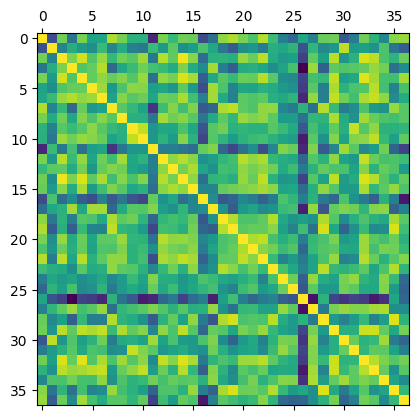

In [5]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)

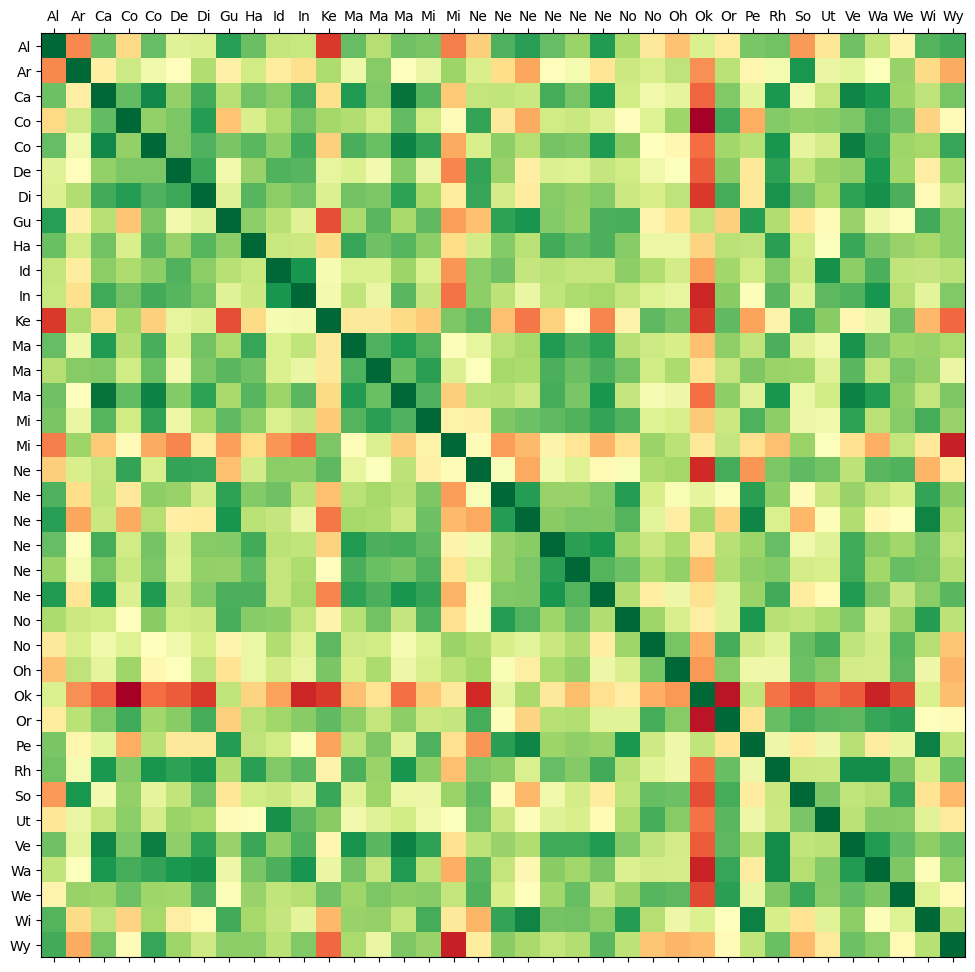

In [20]:
labels = [c[:2] for c in min_wage_corr.columns]

fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)


ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()

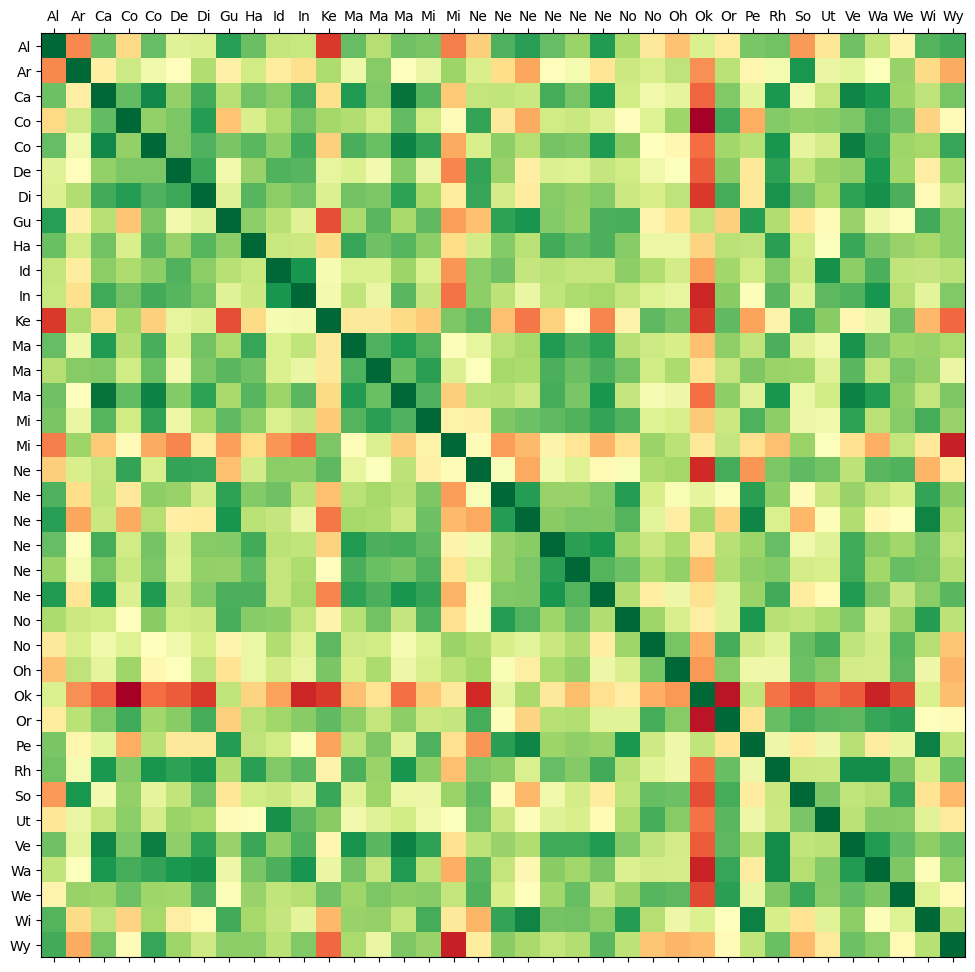

In [19]:
import matplotlib.pyplot as plt

labels = [c[:2] for c in min_wage_corr.columns]  # get abbv state names.

fig = plt.figure(figsize=(12,12))  # figure so we can add axis
ax = fig.add_subplot(111)  # define axis, so we can modify
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)  # display the matrix
ax.set_xticks(np.arange(len(labels)))  # show them all!
ax.set_yticks(np.arange(len(labels)))  # show them all!
ax.set_xticklabels(labels)  # set to be the abbv (vs useless #)
ax.set_yticklabels(labels)  # set to be the abbv (vs useless #)

plt.show()